Coefficients: 
 [[-0.09605197  0.4203215   0.00894511  0.0722733   0.21570946 -1.06270034]
 [ 0.27222011 -0.61794072  0.0418685  -0.09685749  0.11773541 -1.0753882 ]
 [-0.14192593 -0.41836544 -0.00998848 -0.06864572  0.2705705  -0.42581042]
 [ 0.27962704  0.64742975 -0.00685058  0.22979582 -0.41507038 -0.30324162]
 [-0.45127381  0.36374037 -0.00966553 -0.63806414  0.8812924  -0.15648847]
 [-0.10785076 -0.77971449 -0.00122583  0.17482383 -0.79066605 -0.05377822]
 [ 0.72025595 -0.80841113 -0.05380482 -0.02389783 -0.19795312  0.26687994]
 [-0.67753975 -0.78526367 -0.00441595 -0.70790863 -0.73613856  0.44152489]
 [ 0.30500197 -0.04984051 -0.02446438 -0.88548005 -0.87720058  0.3277639 ]
 [-0.22356725  0.54440759 -0.11080835  0.29192884 -0.98376146  0.34095406]]
Variance score: 0.26666666666666666
Mean Squared Error of test data:  2.6666666666666665
Mean Squared Error of train data:  2.0
Real new dose :  [ 4.  8.  5.  2.  6.  6. 12.  4. 10.  6.  8.  7.  3.  4. 12.]
Predicted new dose :  [ 3.

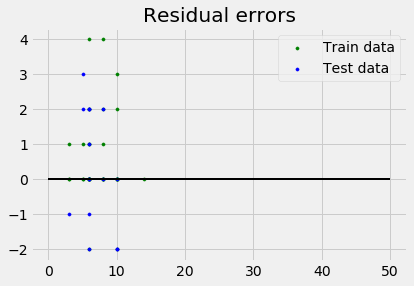

In [15]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics
import csv
from copy import deepcopy

def load_csv(filename):
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    x = list(reader)
    data = np.array(x).astype('float')
    return data
    
def splitDataset(dataset, splitratio):
    trainsize = int(np.round(dataset.shape[0]*splitratio))
    trainset = np.zeros((trainsize,dataset.shape[1]))#array to store the training set.
    testset = deepcopy(dataset)#create a copy of the dataset in test set.
    for numsamples in range(trainsize):
        indx = np.random.randint(0,testset.shape[0])#random index generation
        trainset[numsamples,:] = testset[indx,:]#adding the randomly selected data vector to the training set
        testset = np.delete(testset, indx, axis = 0)#delete the selected observation from the test set.
    return trainset,testset

data = load_csv('preprocessed_data.csv')
trainset, testset = splitDataset(data,0.7)

x_train = trainset[:,:-1]
y_train = trainset[:,-1]

x_test = testset[:,:-1]
y_test = testset[:,-1]
  
# create linear regression object 
reg = linear_model.LogisticRegression() 
  
# train the model using the training sets 
reg.fit(x_train, y_train) 
  
# regression coefficients 
print('Regression coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(x_test, y_test))) 

# mean squared error
print('Mean Squared Error of test data: ', metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('Mean Squared Error of train data: ', metrics.mean_squared_error(y_train, reg.predict(x_train)))

# real and predicted new dose
print('Real new dose : ', y_test)
print('Predicted new dose : ', reg.predict(x_test))
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()
